# Computational Assignment 5: Identifying Handwritten Digits

**Please note that (optionally) this assignment may be completed in groups of 2 students.**

---
In this exercise, we'll explore classification of handwritten digits from the MNIST dataset.

Goals are as follows:

- Train a logistic regression model to classify handwritten digits
- Visualize the filters for each digit learned by logistic regression
- Train a simple MLP to classify handwritten digits, and understand why it is more effective than logistic regression
- Visualize the filters learned by the MLP
- Observe that logistic regression is *not* effective when digits are not centered (why?)

We'll begin by importing required libraries:

- `numpy` for efficient math operations
- `sklearn` for defining and training our logistic regression and MLP models
- `tensorflow` to load the MNIST dataset; next time we'll also use it to build a simple CNN
- `matplotlib` for visualization/plotting

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

Next, we'll load the MNIST dataset. The data are already broken down into:

1. a development set, which we'll use for training
2. a test set, which we'll use to evaluate performance

Since we will not be tuning our models, we will not set aside a validation set. If we were going to create a validation set, we would divide `y_dev` into `y_train` and `y_val`, then evaluate on the test set only once, after deciding on a model. This would give us a more realistic estimate of model performance. Instead, our primary goal here is to understand what is happening with each model.

In [2]:
# Load MNIST
(x_dev, y_dev), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print('There are', len(x_dev), 'training images.')
print('There are', len(x_test), 'test images.')

There are 60000 training images.
There are 10000 test images.


Let's look at 5 example images from our training set. The code block below uses the `ax.imshow` method from matplotlib, which we will also use later in the exercise to visualize learned filters.

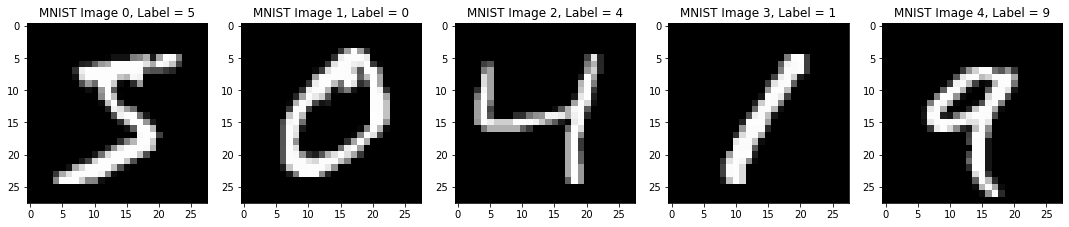

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))
for i in range(5):
    ax[i].imshow(x_dev[i, :, :], cmap='gray')
    ax[i].set_title('MNIST Image %i, Label = %i' % (i, y_dev[i]), fontsize=12)
plt.tight_layout()
plt.show()

From the plots above, we can see that there are 5 distinct digits in the first 5 training images. Let's look at the distribution of the labels across the whole training set to make sure that all 10 digits are equally represented, more or less. In this block, we'll use `np.unique()` to count the number of times each digit occurs within `y_dev`, the labels for our training data.

In generating our plot, the important command is `plt.bar(y_dev_values, y_dev_counts)`, which plots a bar graph of the counts for each value of the labels. The remaining commands make the plot a little more readable.

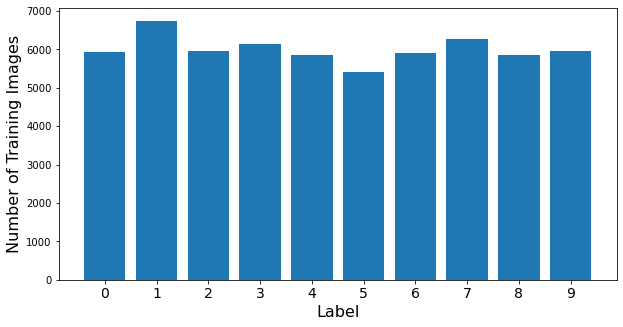

In [14]:
y_dev_values, y_dev_counts = np.unique(y_dev, return_counts=True)

plt.figure(figsize=(10, 5))
plt.bar(y_dev_values, y_dev_counts)
plt.xticks(np.arange(10), fontsize=14)
plt.ylabel('Number of Training Images', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.show()

It looks like all digits are represented equally, more or less. Let's train a logistic regression model to classify them. As in the previous exercise, we'll use `LogisticRegression` from `sklearn.linear_model`. To do this, however, we'll first need to vectorize -- in other words, flatten -- each of the images.

## Flattening our digits

We can do this using the numpy array method `.reshape`. Currently, x_dev has shape (60000, 28, 28), because we have 60000 handwritten digits, each of which is a (28 x 28) grid of pixels. We'd like to flatten each of those (28 x 28) images into a vector of length 28 * 28 = 784, resulting in a *flattened* dataset of shape (60000, 784)

In [16]:
x_dev_flat = x_dev.reshape(60000, 28 * 28)
print(x_dev_flat.shape)

(60000, 784)


A convenient shortcut is to pass -1 as the "length" of one axis, and `numpy` will figure out how long that axis should be based on the length of the other axes and the total number of elements in the array.

In [17]:
x_dev_flat = x_dev.reshape(-1, 28 * 28)
print(x_dev_flat.shape)

(60000, 784)


Note that we can also *un*-flatten an image with `.reshape`, as shown in the following block. **You will need to do this in these exercises to visualize the filters learned by the models you will train.**

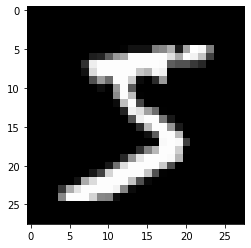

In [20]:
plt.imshow(x_dev[0, :].reshape(28, 28), cmap='gray')
plt.show()

## Exercise 1: Logistic Regression

In the following block, you should:
- Train a logistic regression model (i.e. `LogisticRegression()`) to predict the labels of digits in MNIST.
- After training a model on the development set (`x_dev_flat`), evaluate its accuracy on the test set.

To make predictions on the test set, you'll need to create a flattened version of the test set the same way we created a flattened version of the training set. If you need to review how to train and evaluate a logistic regression model, please consult [computational exercise 3](https://github.com/mengelhard/bsrt_ml4h/blob/master/notebooks/ce3.ipynb).

In [21]:
### CREATE A LOGISTIC REGRESSION MODEL AND TRAIN IT ON THE FLATTENED DEVELOPMENT SET ###


### USE THE TRAINED MODEL TO MAKE PREDICTIONS ON THE (FLATTENED) TEST SET ###


### EVALUATE THE ACCURACY OF THE MODEL'S PREDICTIONS ON THE TEST SET ###


## Exercise 2: Visualize the learned filters

The filters of your trained model can be accessed with `.coef_`. If your model is called `lr_model`, for example, then `lr_model.coef_` will be an array of size (10, 784) corresponding to the 10 filters -- one for each digit -- each of which is the same length (784) as the vectorized images.

In the following block(s), you should:
- access these vectors of coefficients
- reshape each of them to have shape (28, 28), which makes it easier to visualize them as filters applied to the handwritten digits
- plot each (28 x 28) filter with `plt.imshow` in the same way we plotted the first few handwritten digits at the beginning of the exercise

Once you've plotted these filters, consider:
- why do the filters look somewhat like the digits they identify?
- why do they not look *exactly* like a handwritten digit?

In [22]:
### ACCESS THE MODEL COEFFICIENTS ###


### RESHAPE EACH OF THE 10 COEFFICIENT VECTORS TO HAVE SHAPE (28, 28) ###


### PLOT EACH OF THE RESHAPED VECTORS (i.e. FILTERS) ###


## Exercise 3: Multilayer Perceptron

In exercises 3 and 4, we'll repeat exercises 1 and 2 with a multilayer perceptron. In the following block, you should:
- Train a multilayer perceptron model (i.e. `MLPClassifier()`) to predict the labels of digits in MNIST.
- After training a model on the development set (`x_dev_flat`), evaluate its accuracy on the test set.
- You may use any architecture (i.e. hidden layer sizes) you like. A single hidden layer with 50 hidden units should be sufficient to improve performance compared to the earlier, logistic regression model.

In [23]:
### CREATE A MULTILAYER PERCEPTRON MODEL AND TRAIN IT ON THE FLATTENED DEVELOPMENT SET ###


### USE THE TRAINED MODEL TO MAKE PREDICTIONS ON THE (FLATTENED) TEST SET ###


### EVALUATE THE ACCURACY OF THE MODEL'S PREDICTIONS ON THE TEST SET ###


## Exercise 4: Visualize the MLP filters

The filters in the *first fully-connected layer* of your model can be accessed with `.coefs_[0].T`. If your model is called `mlp_model`, for example, then `mlp_model.coefs_[0].T` will be an array of size (M, 784) corresponding to the M filters -- one for each hidden unit in your first hidden layer -- each of which is the same length (784) as the vectorized images.

In the following block(s), you should:
- access these vectors of coefficients
- reshape each of them to have shape (28, 28), which makes it easier to visualize them as filters applied to the handwritten digits
- plot each (28 x 28) filter with `plt.imshow` in the same way you plotted the filters of the logistic regression model

Once you've plotted these filters, consider:
- do these filters look similar to the filters in the logistic regression model?
- are they recognizable?
- what are these filters "detecting", and why do they look the way they do?

Note that these questions are just for you to consider, and are **not** a required part of the exercise.

In [24]:
### ACCESS THE MODEL COEFFICIENTS ###


### RESHAPE EACH OF THE M COEFFICIENT VECTORS TO HAVE SHAPE (28, 28) ###


### PLOT EACH OF THE RESHAPED VECTORS (i.e. FILTERS) ###



## Once you've completed these exercises, please turn in the assignment as follows:

If you're using Anaconda on your local machine:
1. download your notebook as html (see `File > Download as > HTML (.html)`)
2. .zip the file (i.e. place it in a .zip archive)
3. submit the .zip file in Talent LMS

If you're using Google Colab:
1. download your notebook as .ipynb (see `File > Download > Download .ipynb`)
2. if you have nbconvert installed, convert it to .html; if not, leave is as .ipynb
3. .zip the file (i.e. place it in a .zip archive)
4. submit the .zip file in Talent LMS

In [15]:
EPOCHS = 3

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

    for images, labels in train_ds:
        train_step(images, labels)

    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)
        
    print('Epoch %i, Loss: %.3f, Accuracy: %.2f%%, Test Loss: %.3f, Test Accuracy: %.2f%%' % (
        (epoch + 1),
        train_loss.result(),
        train_accuracy.result() * 100,
        test_loss.result(),
        test_accuracy.result() * 100))

Epoch 1, Loss: 3.618, Accuracy: 86.12%, Test Loss: 2.830, Test Accuracy: 91.25%
Epoch 2, Loss: 3.338, Accuracy: 91.33%, Test Loss: 3.574, Test Accuracy: 91.48%
Epoch 3, Loss: 3.467, Accuracy: 92.39%, Test Loss: 2.864, Test Accuracy: 94.04%


As we hypothesized, our CNN is able to recognize these digits effectively even though they're no longer centered, with a test accuracy of over 94%. Let's take a look at the filters corresponding to each digit.

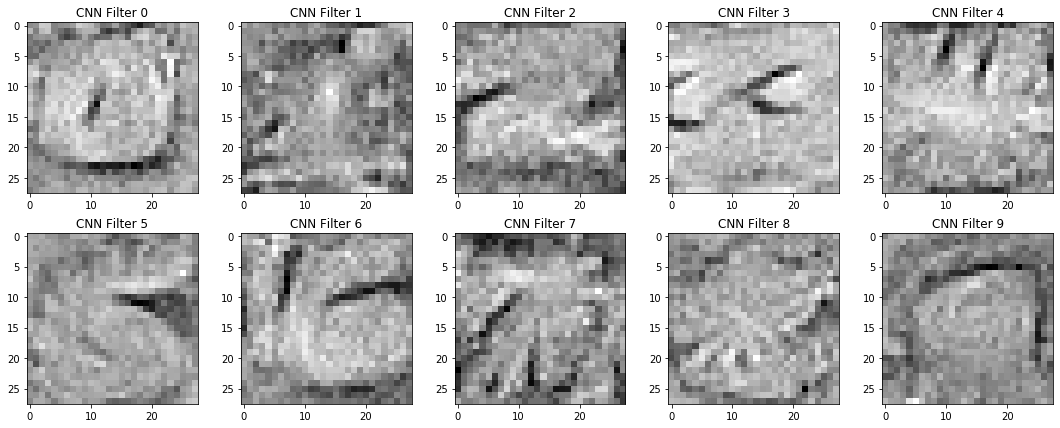

In [16]:
filters = model.conv1.get_weights()[0]

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

for i in range(10):
    ax[i // 5, i % 5].imshow(filters[:, :, 0, i], cmap='gray')
    ax[i // 5, i % 5].set_title('CNN Filter %i' % i, fontsize=12)
plt.tight_layout()
plt.show()

Do these filters resemble the digits they identify? If not, why might these be the case? *(This is not a required question)*

### Question 3: Rotated Digits
We've now demonstrated that a CNN can identify digits even when they're not centered. Would our trained CNN be able to correctly identify digits even if they were rotated? For example, we might modify the test set so that all images were rotated by 90 degrees, then try to predict their labels using the model we have already trained. In a few sentences, describe why this would work, or why not. It may be interesting to test your hypothesis, but this is not required.

### Question 4: Beyond MNIST
Classifying handwritten digits is a difficult problem, but classification of medical images tends to be much more difficult. In 2-3 short paragraphs, describe a potential clinical/medical application of CNN-based image classification that is different from those discussed in class. What are some obstacles you might expect to encounter when designing or implementing a model for this application? These obstacles could be technical, clinical, or both.

### Extra Credit Challenge:
Create and train a model (on the development set) that is over 98% accurate on the test set. You may use an MLP, a CNN, or any other model you like.